<a href="https://colab.research.google.com/github/EnFiore/machine-learning-fondamenti/blob/main/6%20-%20Clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L'algoritmo K-means

In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imposta grandezza visualizazione
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme()

In [3]:
RANDOM_SEED = 2

### Generiamo i dati

<Axes: >

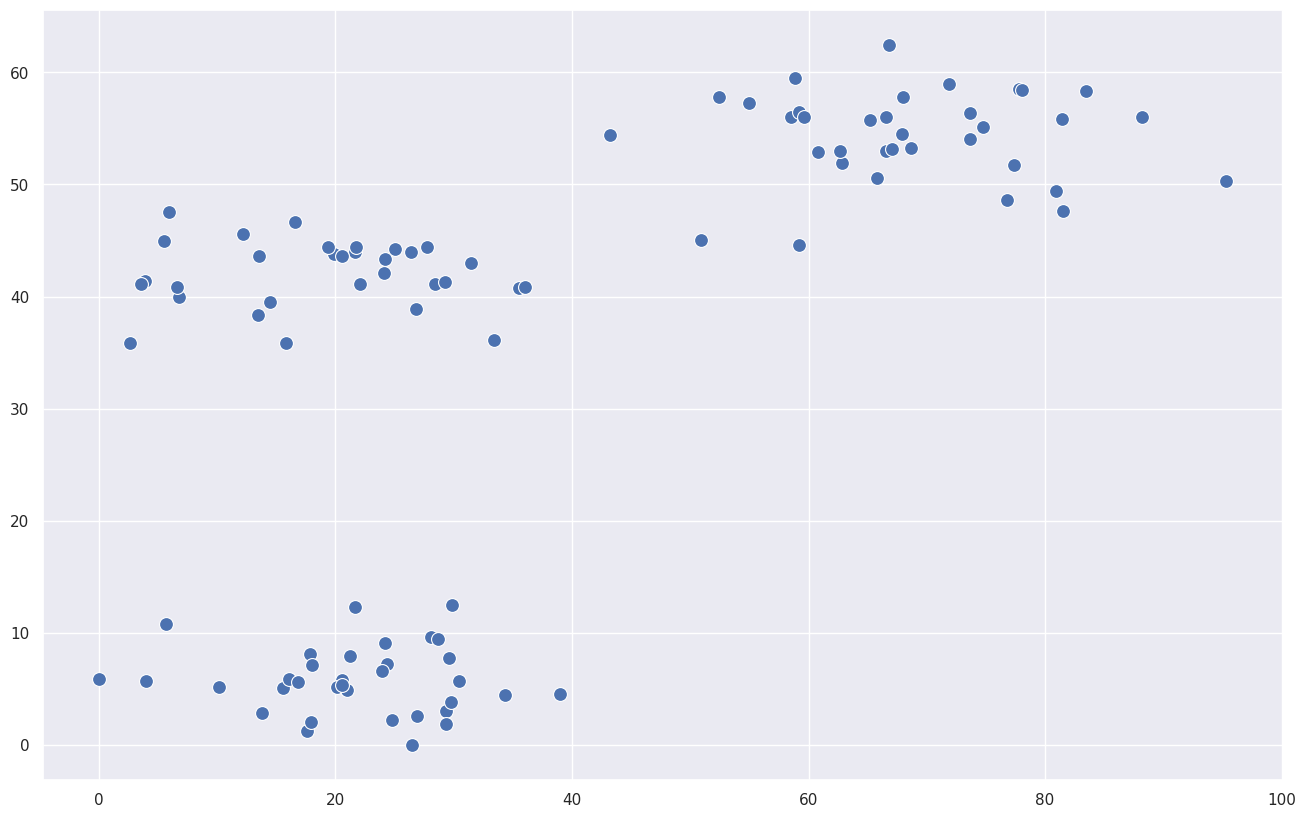

In [12]:
#funzione make_blobs crea dataset, ma senza target quindi si mette _
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    random_state=RANDOM_SEED
)
#print(X)

X[:,0] = (X[:,0]-X[:,0].min())*20
X[:,1] = (X[:,1]-X[:,1].min())*6
#disegno le features mettendo i valori dell'array in x e y
sns.scatterplot(x=X[:,0], y=X[:,1], s=100)

### Creiamo il modello

In [14]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
from time import time

In [15]:

kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED)
tick = time()
#nell'addestramento si passano solo le feature perchè i target non si hanno
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.06120 secondi


In [16]:
#inizializzo il modello con init="kmenas++" che indica che i cluster devono avere distanza fra loro massima
kmeans = KMeans(n_clusters=3, random_state=RANDOM_SEED, init="k-means++")
tick = time()
kmeans.fit(X)
print(f"Modello addestrato in {time()-tick:.5f} secondi" )

Modello addestrato in 0.00502 secondi


### Valutiamo il modello

In [17]:
from scipy.spatial.distance import cdist


In [20]:
#calcolo la distanza tra punti e centroid, clusters_centers_ restituice i centroidi dei cluster
distorsion = sum(
    np.square(
        np.min(
            cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1
    ))) / X.shape[0]
distorsion.item()

107.41040694974288

In [ ]:
inertia = sum(
    np.square(
        np.min(
            cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1
    )))
inertia

10741.040694974288

In [ ]:
#l'inerzia può essere ricavata tramite un attributo del modello
kmeans.inertia_

10741.040694974286

### Visualizziamo i cluster

In [22]:
#eseguo le previsioni
y_kmeans = kmeans.predict(X)

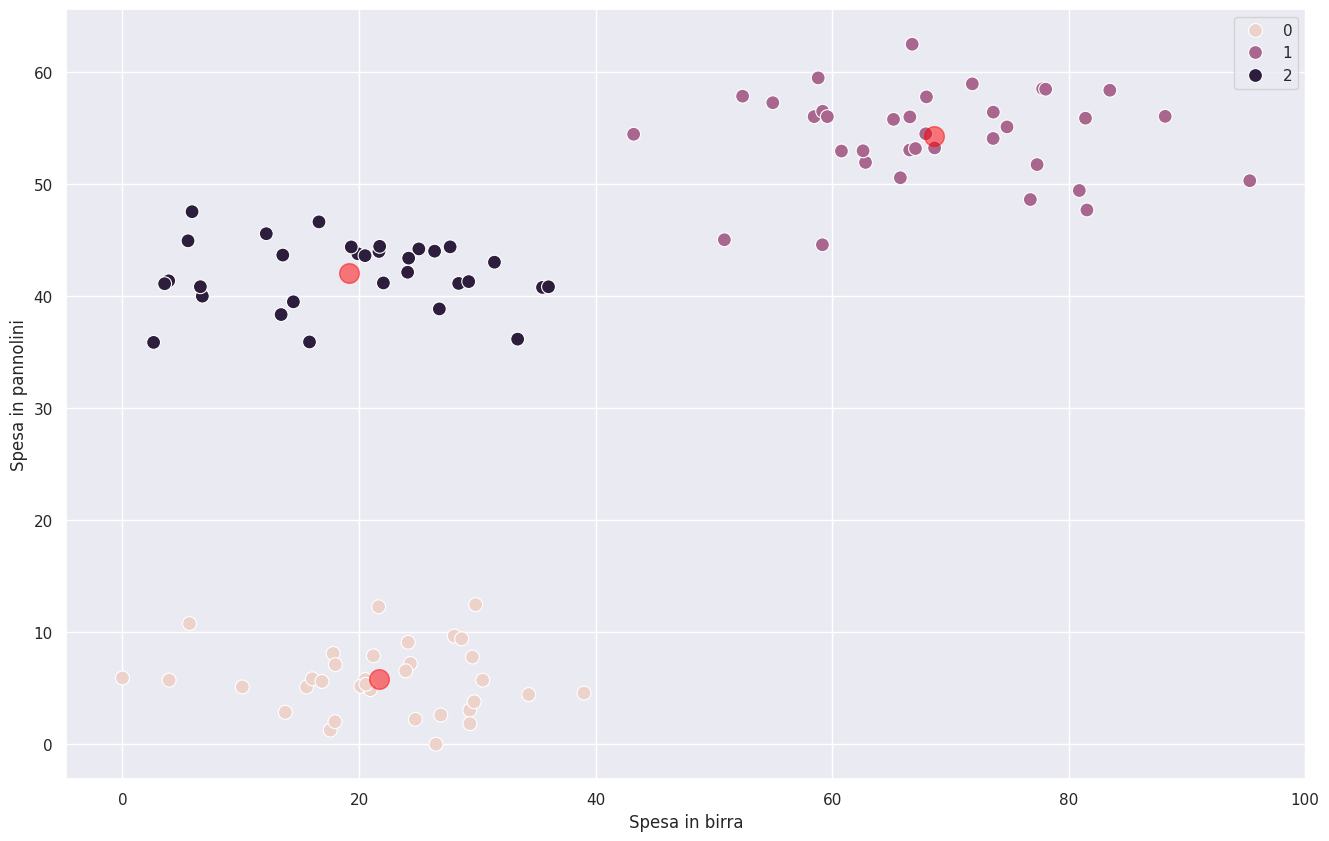

In [23]:
#sull'asse delle x una features, sull'asse delle y l'altra feature
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_kmeans, s=100)
plt.xlabel("Spesa in birra")
plt.ylabel("Spesa in pannolini")

#calcolo i centroidi
centers = kmeans.cluster_centers_
#aggiungo i centroidi con le coordinate X e Y
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

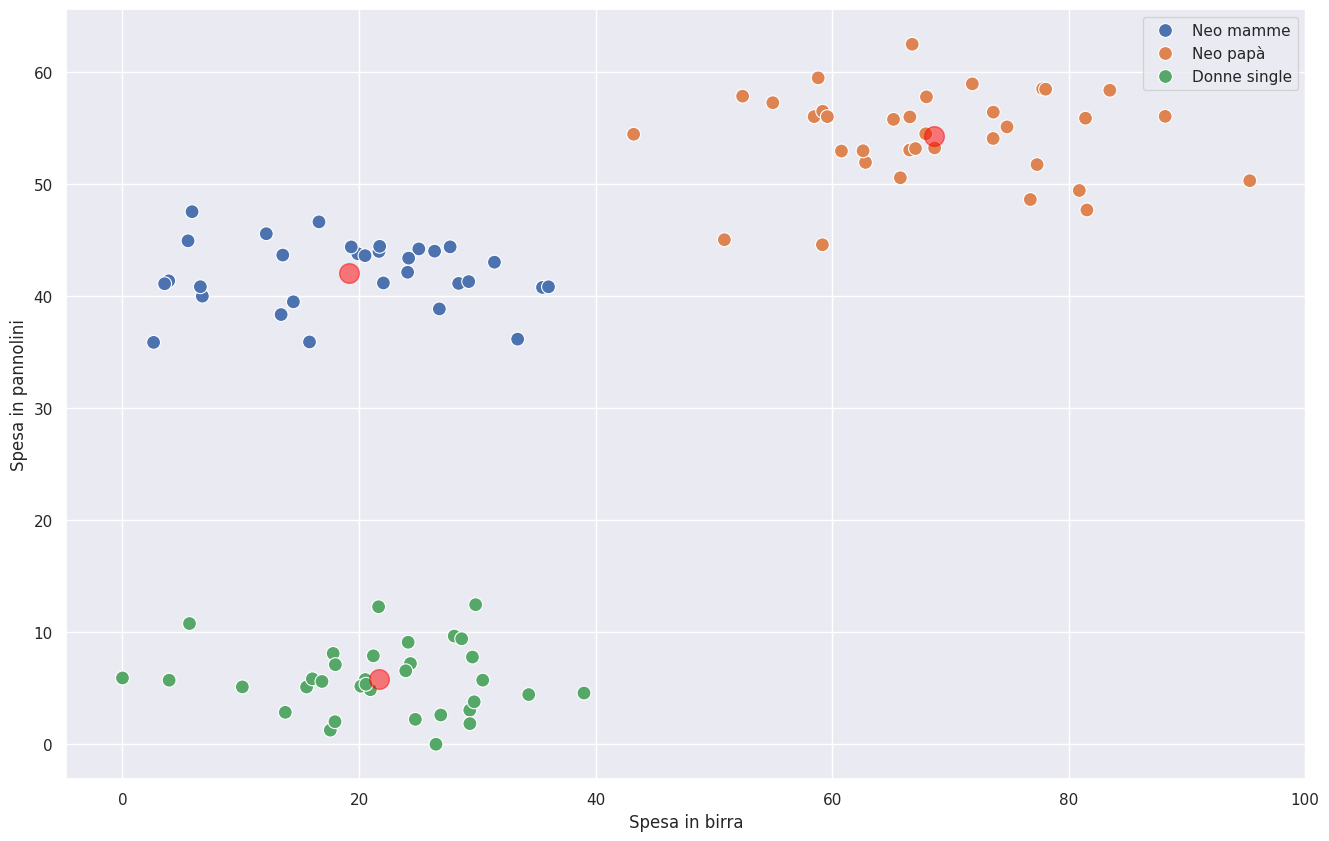

In [24]:
#ASSOCIO AI DIVERSI CLUSTER UN SIGNIFICATO
L = {0:"Donne single",1:"Neo papà",2:"Neo mamme"}
#funzione che sostituisce valore nuemrico con la stringa
vfunc = np.vectorize(lambda x: L[x])
#applico la funzione alle classi ottenute dal modello
labels = vfunc(y_kmeans)
#sull'asse delle x una features, sull'asse delle y l'altra feature
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, s=100)
plt.xlabel("Spesa in birra")
plt.ylabel("Spesa in pannolini")

#calcolo i centroidi
centers = kmeans.cluster_centers_
#aggiungo i centroidi con le coordinate X e Y
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);